In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
!gdown 1WH8HDWKvFfxmacUPouVjb22gzKG9nhVJ

Downloading...
From: https://drive.google.com/uc?id=1WH8HDWKvFfxmacUPouVjb22gzKG9nhVJ
To: /content/round-4-island-data-bottle.zip
100% 720k/720k [00:00<00:00, 28.4MB/s]


In [ ]:
!gdown 19VX93Eo5ChsK5uN9-8i_WXEr5BniNnWN

Downloading...
From: https://drive.google.com/uc?id=19VX93Eo5ChsK5uN9-8i_WXEr5BniNnWN
To: /content/coco.zip
100% 36.3k/36.3k [00:00<00:00, 50.2MB/s]


In [ ]:
!unzip /content/round-4-island-data-bottle.zip

Archive:  /content/round-4-island-data-bottle.zip
  inflating: prices_round_4_day_1.csv  
  inflating: __MACOSX/._prices_round_4_day_1.csv  
  inflating: prices_round_4_day_2.csv  
  inflating: __MACOSX/._prices_round_4_day_2.csv  
  inflating: prices_round_4_day_3.csv  
  inflating: __MACOSX/._prices_round_4_day_3.csv  
  inflating: trades_round_4_day_1_nn.csv  
  inflating: __MACOSX/._trades_round_4_day_1_nn.csv  
  inflating: trades_round_4_day_2_nn.csv  
  inflating: __MACOSX/._trades_round_4_day_2_nn.csv  
  inflating: trades_round_4_day_3_nn.csv  
  inflating: __MACOSX/._trades_round_4_day_3_nn.csv  


In [ ]:
!unzip /content/coco.zip

Archive:  /content/coco.zip
   creating: coco/
  inflating: coco/trades_round_4_day_2_wn.csv  
  inflating: __MACOSX/coco/._trades_round_4_day_2_wn.csv  
  inflating: coco/trades_round_4_day_3_wn.csv  
  inflating: __MACOSX/coco/._trades_round_4_day_3_wn.csv  
  inflating: coco/trades_round_4_day_1_wn.csv  
  inflating: __MACOSX/coco/._trades_round_4_day_1_wn.csv  


In [ ]:
snakes1 = pd.read_csv('coco/trades_round_4_day_1_wn.csv', sep = ';')
snakes2 = pd.read_csv('coco/trades_round_4_day_2_wn.csv', sep = ';')
snakes3 = pd.read_csv('coco/trades_round_4_day_3_wn.csv', sep = ';')

In [ ]:
day1 = pd.read_csv('prices_round_4_day_1.csv', sep = ';')
day2 = pd.read_csv('prices_round_4_day_2.csv', sep = ';')
day3 = pd.read_csv('prices_round_4_day_3.csv', sep = ';')


In [ ]:
day1 = day1.rename(columns={'product': 'symbol'})
day2 = day2.rename(columns={'product': 'symbol'})
day3 = day3.rename(columns={'product': 'symbol'})

In [ ]:
trades1 = snakes1.merge(day1, on = ['timestamp', 'symbol'])
trades2 = snakes2.merge(day2, on = ['timestamp', 'symbol'])
trades3 = snakes3.merge(day3, on = ['timestamp', 'symbol'])

In [ ]:
snakes2['timestamp'] = snakes2['timestamp'] + 1000000
snakes3['timestamp'] = snakes3['timestamp'] + 2000000

In [ ]:
prices_df = pd.concat([day1, day2, day3]).reset_index()

In [ ]:
prices_df['timestamp'] = prices_df['timestamp'] + (prices_df['day'] - 1) * 1000000

In [ ]:
trades_df = pd.concat([snakes1, snakes2, snakes3]).reset_index()

In [ ]:
prices_df['symbol'].unique()

array(['COCONUT', 'COCONUT_COUPON'], dtype=object)

In [ ]:
trades_df['buyer'].unique()

array(['Valentina', 'Vinnie', 'Vladimir', 'Ruby', 'Raj', 'Rhianna'],
      dtype=object)

In [ ]:
trades_df['seller'].unique()

array(['Valentina', 'Vinnie', 'Ruby', 'Rhianna', 'Raj', 'Vladimir'],
      dtype=object)

In [ ]:
products = ['COCONUT', 'COCONUT_COUPON']
traders = ['Valentina', 'Vinnie', 'Ruby', 'Rhianna', 'Vladimir', 'Raj']

In [ ]:
prices_df['day_till_expiry'] = (250 - prices_df['timestamp']/1000000)/250

In [ ]:
prices_df['day_till_expiry']

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        0.999999
           ...   
59995    0.988001
59996    0.988001
59997    0.988001
59998    0.988000
59999    0.988000
Name: day_till_expiry, Length: 60000, dtype: float64

In [ ]:
trades_df

,index,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,800,Valentina,Valentina,COCONUT_COUPON,SEASHELLS,636.0,5
1,1,900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,634.0,17
2,2,1100,Valentina,Ruby,COCONUT_COUPON,SEASHELLS,635.0,17
3,3,1900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,635.0,16
4,4,2000,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,637.0,14
...,...,...,...,...,...,...,...,...
5124,1691,2996200,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,585.0,14
5125,1692,2997100,Vinnie,Vinnie,COCONUT,SEASHELLS,9885.0,9
5126,1693,2997200,Vinnie,Vinnie,COCONUT,SEASHELLS,9883.0,8
5127,1694,2998600,Vinnie,Raj,COCONUT,SEASHELLS,9887.0,5


In [ ]:
import matplotlib.pyplot as plt

def plotter(symbol, trader, trades_df, prices_df, color, xlim1, xlim2):
    trades_df[(trades_df['buyer'] == trader) & (trades_df['seller'] == trader)]['quantity'] = 0
    trader_trades = trades_df[(trades_df['buyer'] == trader) | (trades_df['seller'] == trader)]
    trader_buys = trades_df[(trades_df['buyer'] == trader)]
    trader_sells = trades_df[(trades_df['seller'] == trader)]

    trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]
    dfp = prices_df[prices_df['symbol'] == symbol]
    tpt = trader_trades[trader_trades['symbol'] == symbol]
    ts = trader_sells[trader_sells['symbol'] == symbol]
    tb = trader_buys[trader_buys['symbol'] == symbol]

    fig, ax1 = plt.subplots(figsize=(15, 10))

    # Plot mid price and trades
    ax1.plot(dfp['timestamp'], dfp['mid_price'], label='Mid Price', color='black')
    if color == 'green':
        ax1.scatter(tb['timestamp'], tb['price'], color='green', label='Buy Trades')
    if color == 'red':
        ax1.scatter(ts['timestamp'], ts['price'], color='red', label='Sell Trades')
    if color == 'both':
        ax1.scatter(tb['timestamp'], tb['price'], color='green', label='Buy Trades')
        ax1.scatter(ts['timestamp'], ts['price'], color='red', label='Sell Trades')

    ax1.set_title(f"{trader} trading {symbol}")
    ax1.set_xlim(xlim1, xlim2)
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Price')

    # Plot rolling sum of quantity on secondary y-axis
    ax2 = ax1.twinx()
    rolling_sum = tpt['quantity'].cumsum()
    ax2.plot(tpt['timestamp'], rolling_sum, color='blue', label='Cumulative Sum of Quantity')
    ax2.set_ylabel('Quantity (Cumulative Sum)')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()


In [ ]:
trades_df[trades_df['buyer'] == 'Rhianna']

,index,timestamp,buyer,seller,symbol,currency,price,quantity
46,46,26500,Rhianna,Vinnie,COCONUT,SEASHELLS,9996.0,3
96,96,51300,Rhianna,Vinnie,COCONUT,SEASHELLS,9969.0,3
101,101,54200,Rhianna,Valentina,COCONUT_COUPON,SEASHELLS,622.0,4
112,112,58000,Rhianna,Vinnie,COCONUT,SEASHELLS,9966.0,2
125,125,64100,Rhianna,Vinnie,COCONUT,SEASHELLS,9947.0,3
...,...,...,...,...,...,...,...,...
5096,1663,2981200,Rhianna,Vinnie,COCONUT,SEASHELLS,9886.0,1
5100,1667,2984200,Rhianna,Vinnie,COCONUT,SEASHELLS,9882.0,3
5111,1678,2989700,Rhianna,Vinnie,COCONUT,SEASHELLS,9879.0,3
5117,1684,2993200,Rhianna,Vinnie,COCONUT,SEASHELLS,9888.0,3


<ipython-input-28-91c844eadc00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_df[(trades_df['buyer'] == trader) & (trades_df['seller'] == trader)]['quantity'] = 0
<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


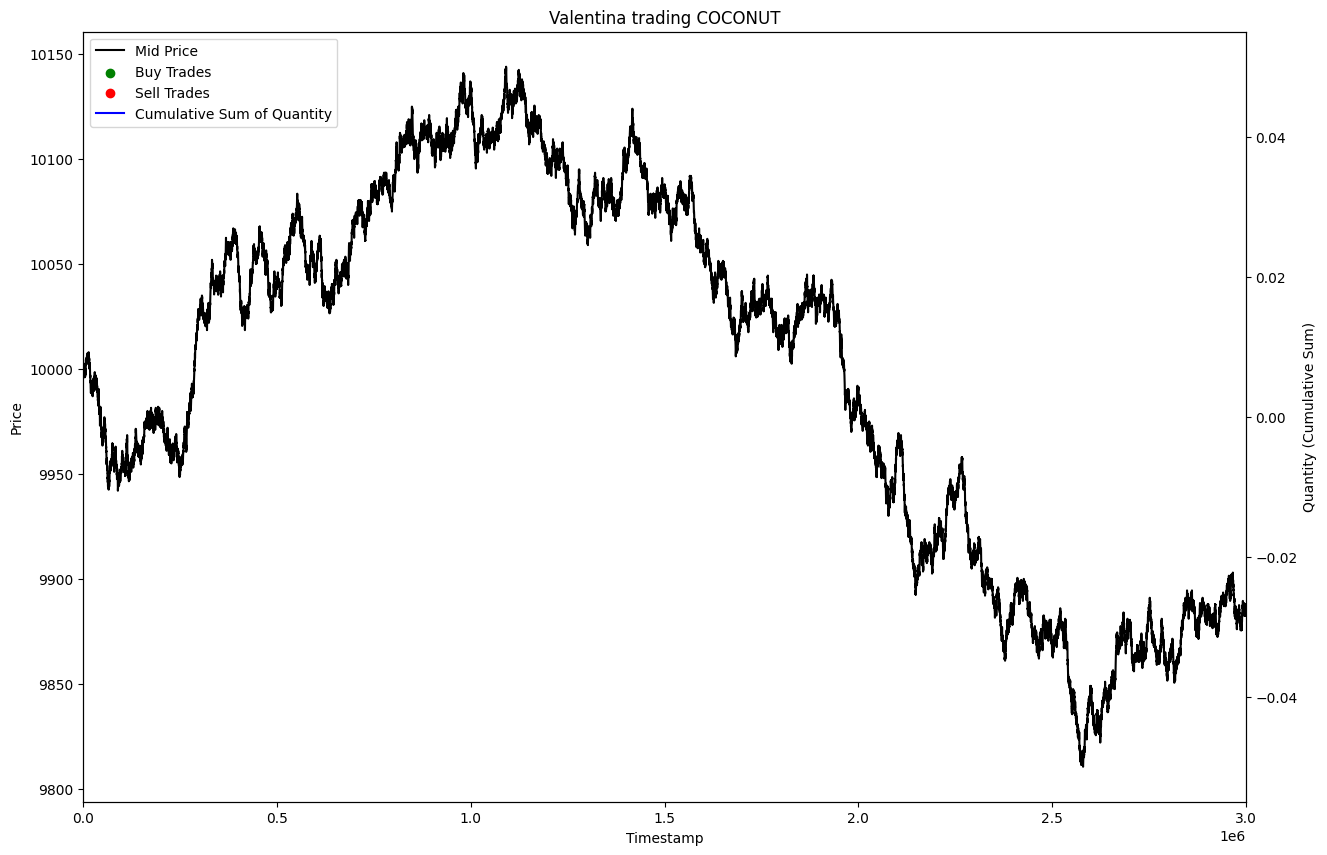

<ipython-input-28-91c844eadc00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_df[(trades_df['buyer'] == trader) & (trades_df['seller'] == trader)]['quantity'] = 0
<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


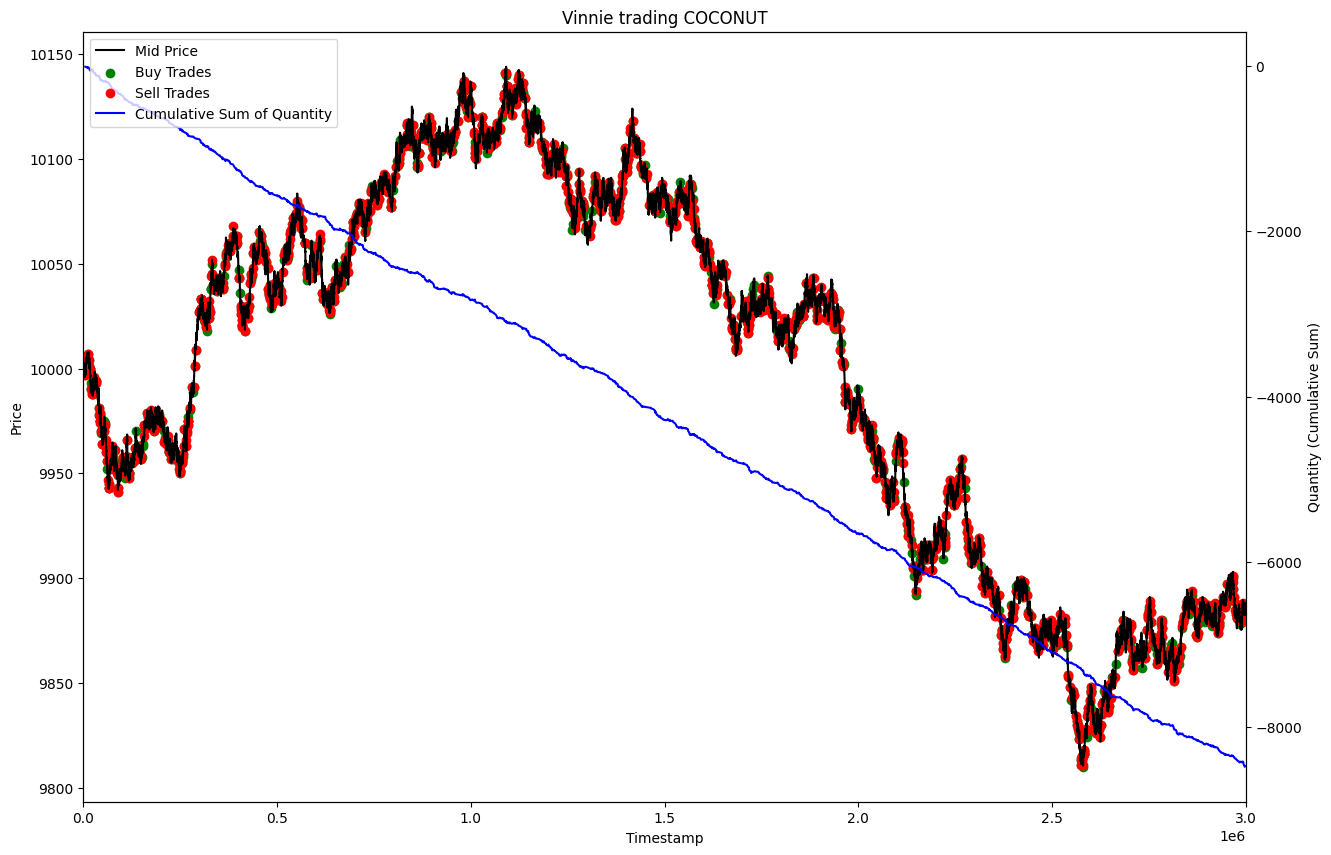

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


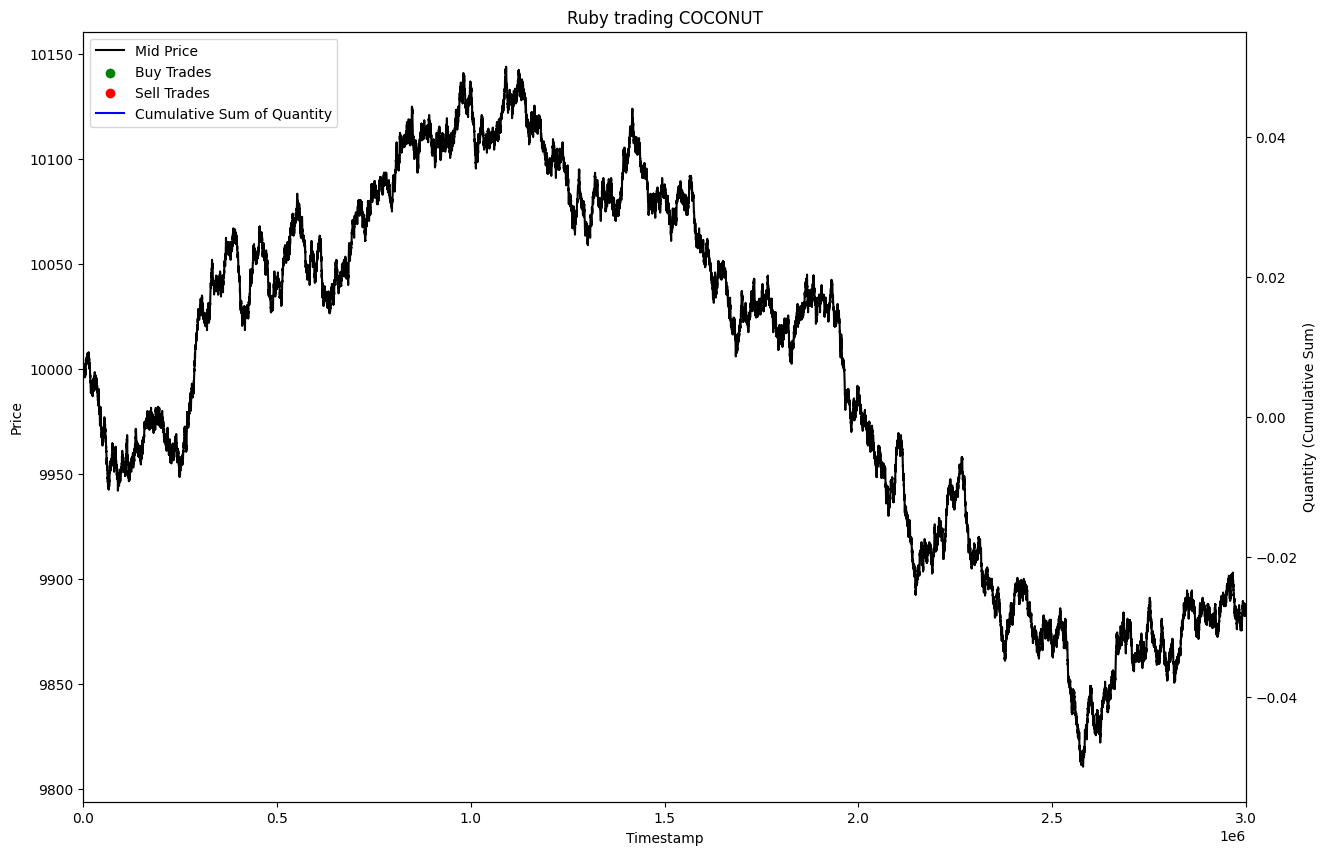

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


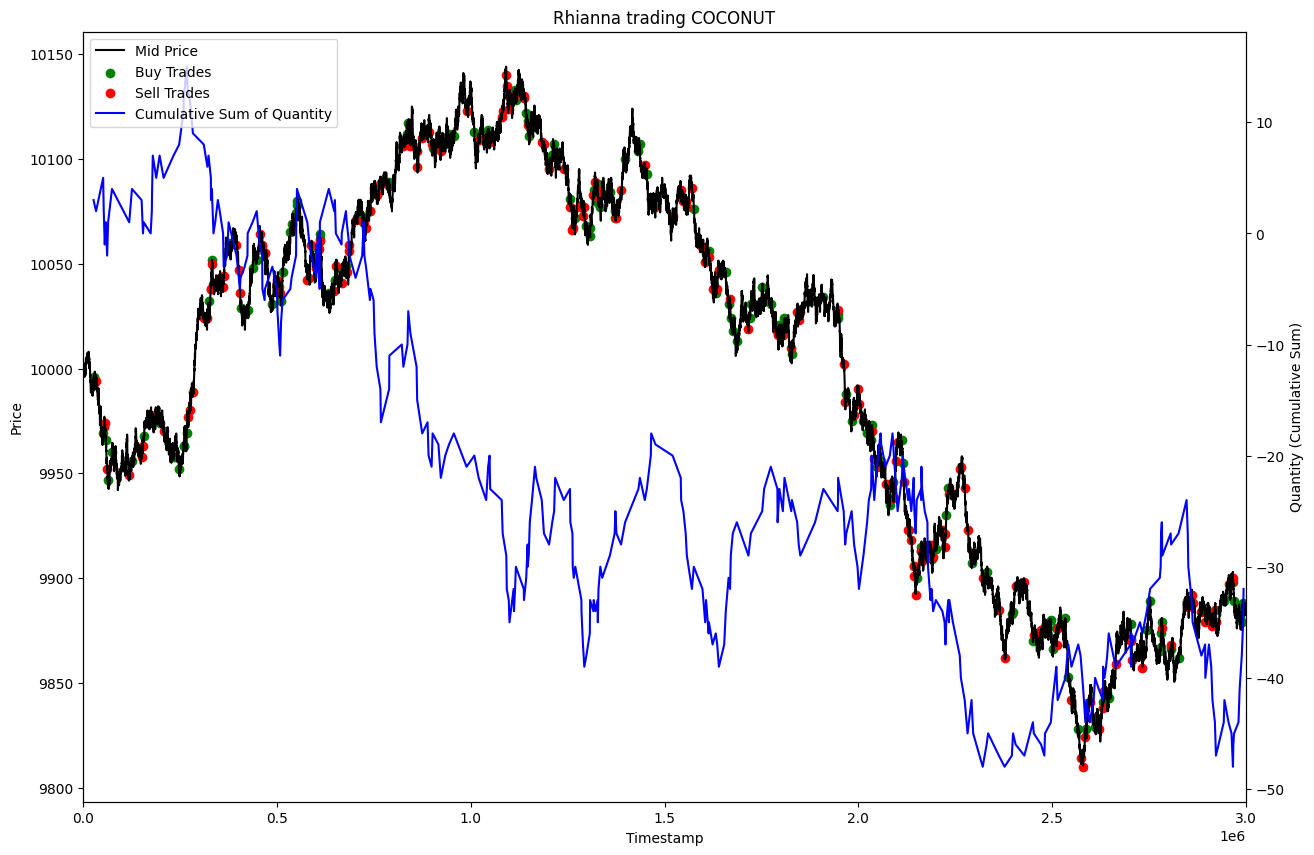

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


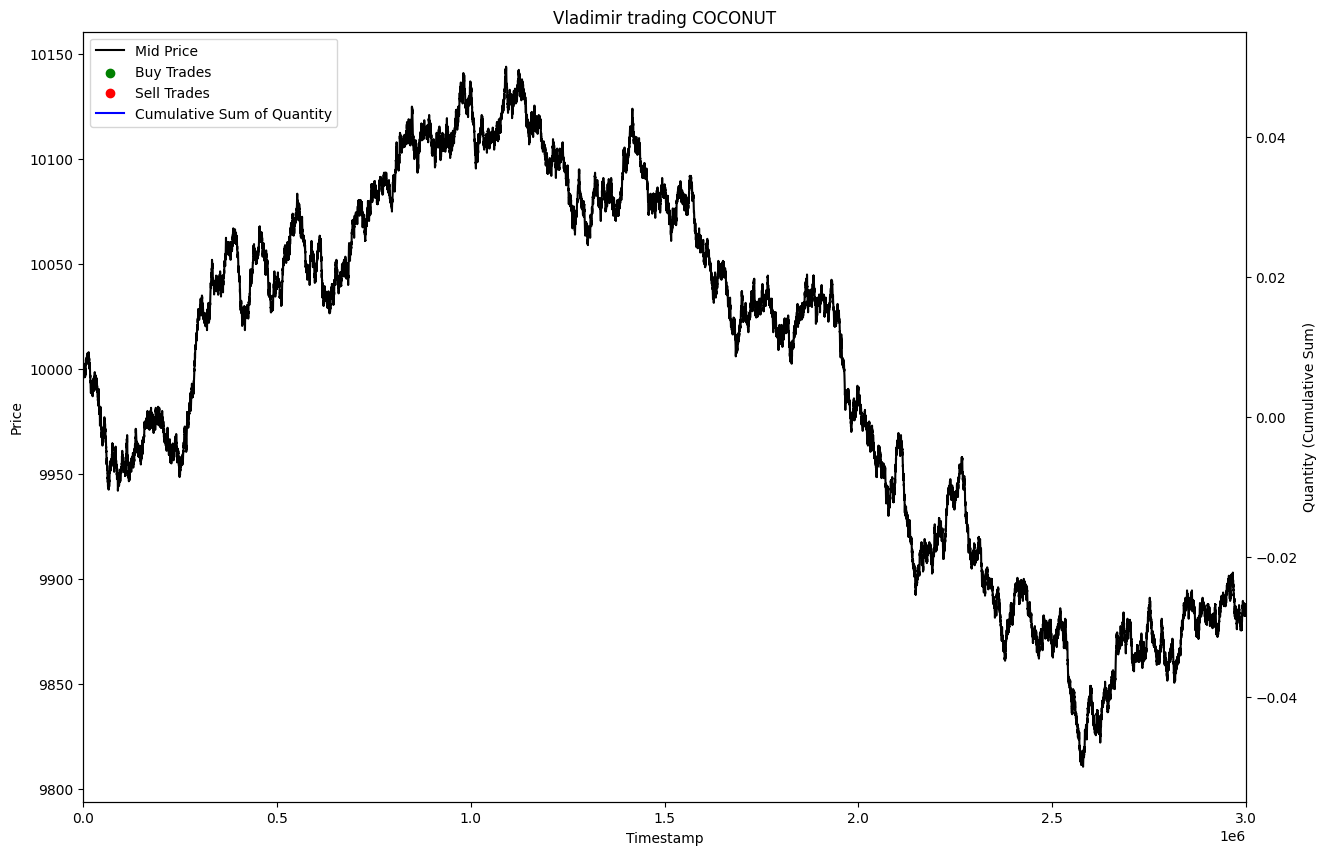

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


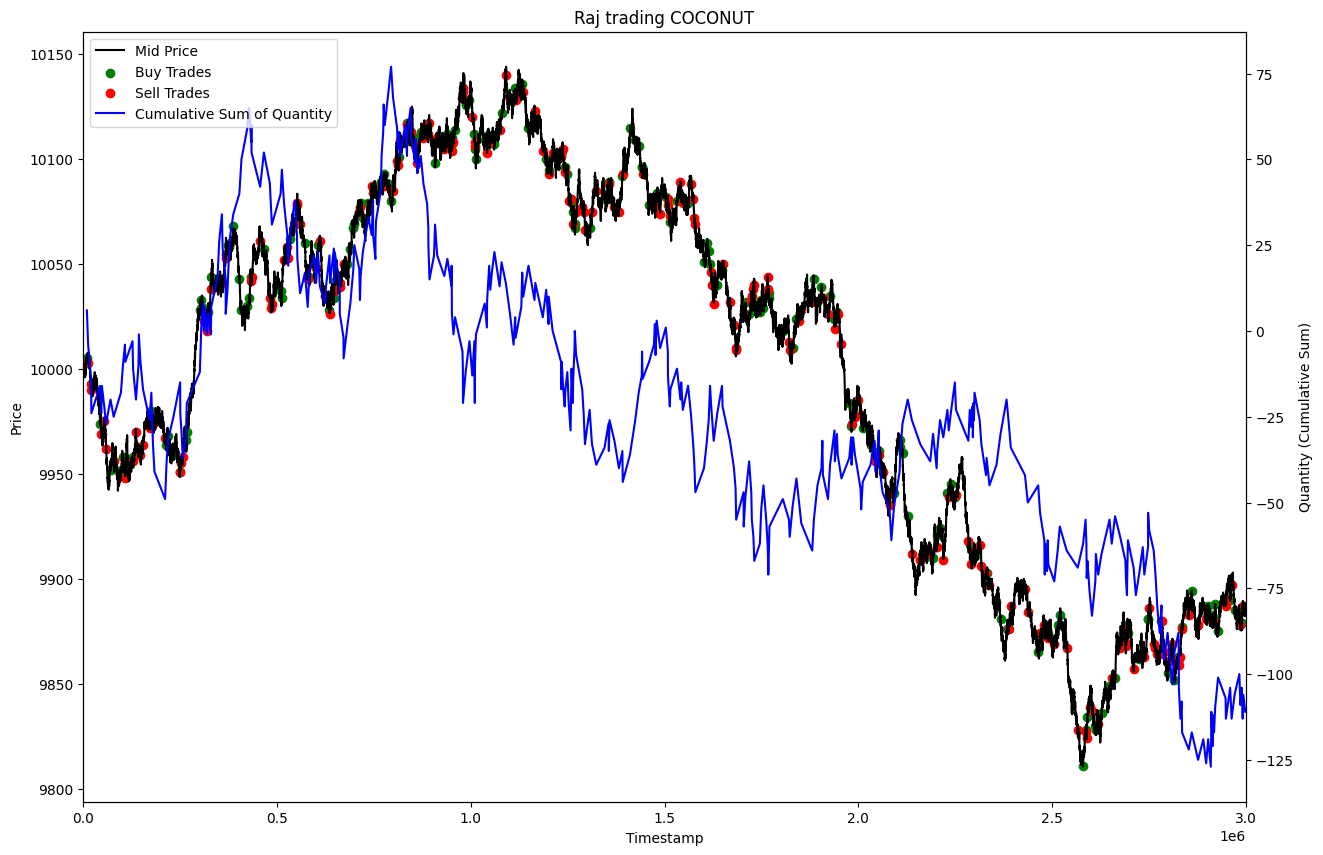

<ipython-input-28-91c844eadc00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_df[(trades_df['buyer'] == trader) & (trades_df['seller'] == trader)]['quantity'] = 0
<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


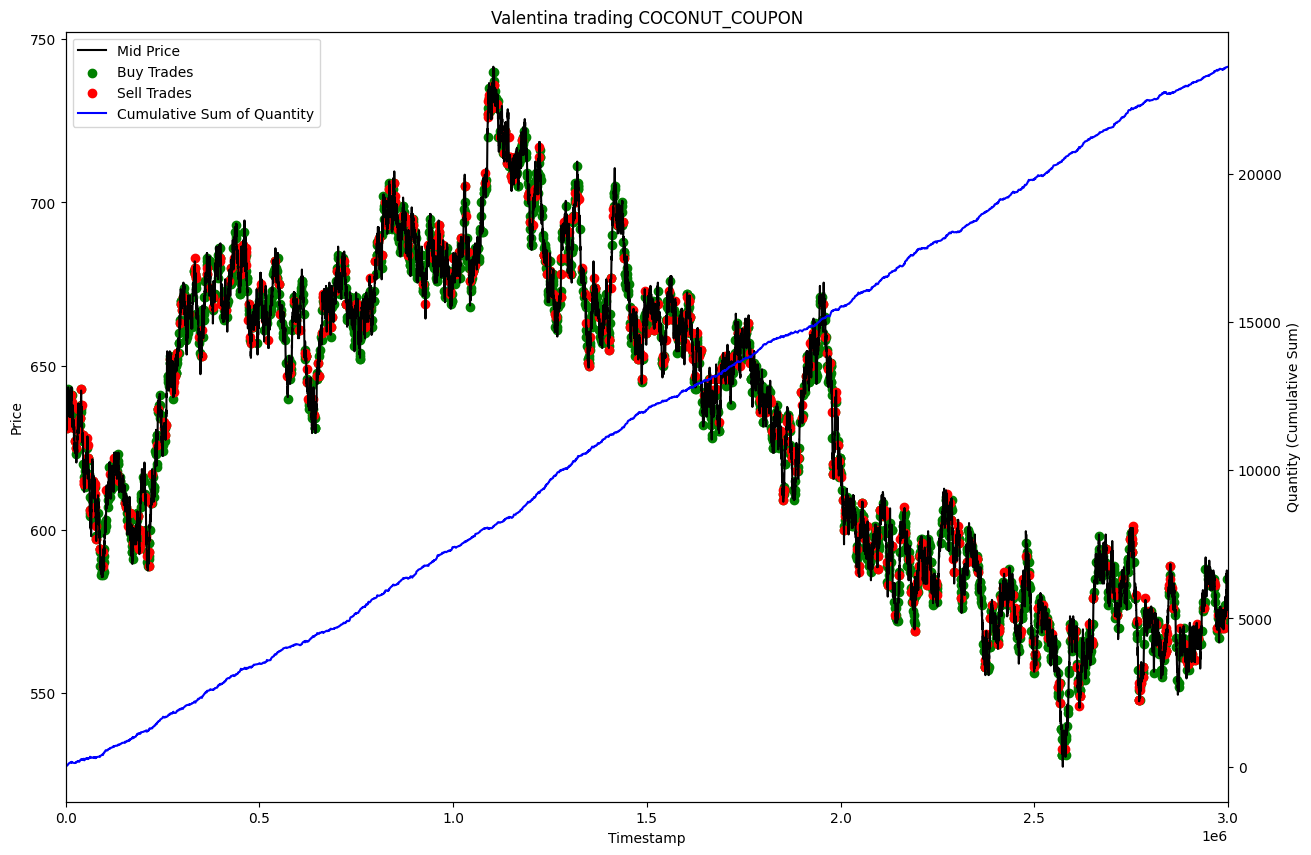

<ipython-input-28-91c844eadc00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_df[(trades_df['buyer'] == trader) & (trades_df['seller'] == trader)]['quantity'] = 0
<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


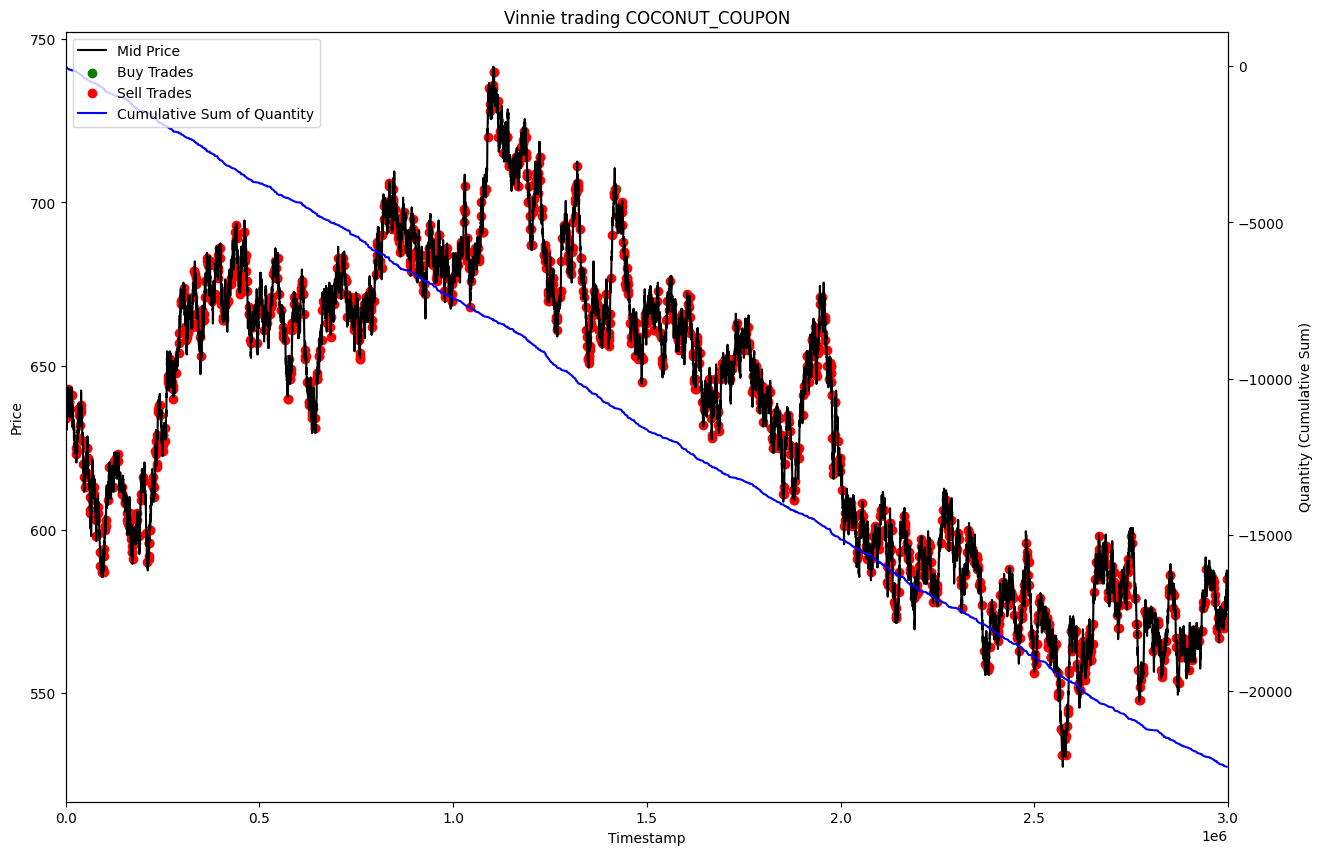

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


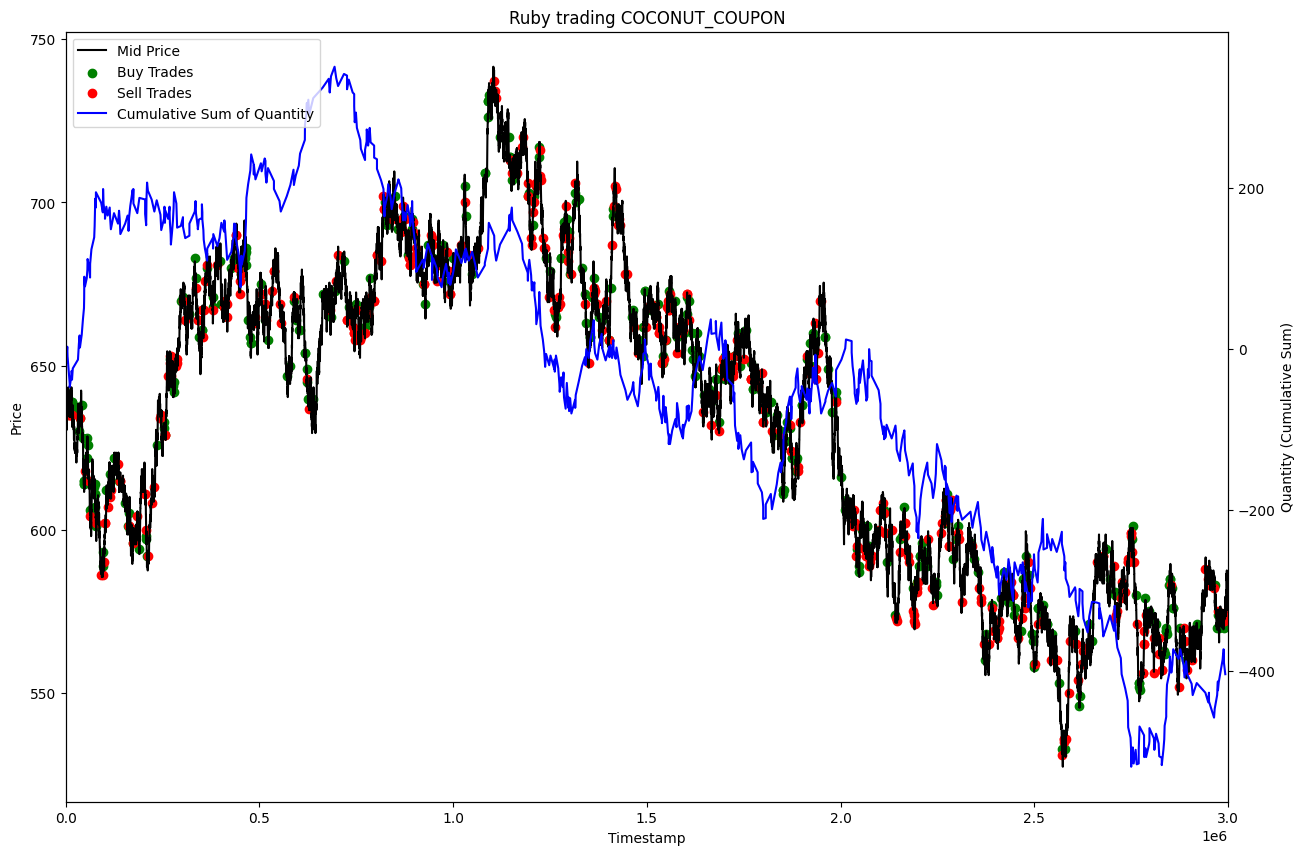

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


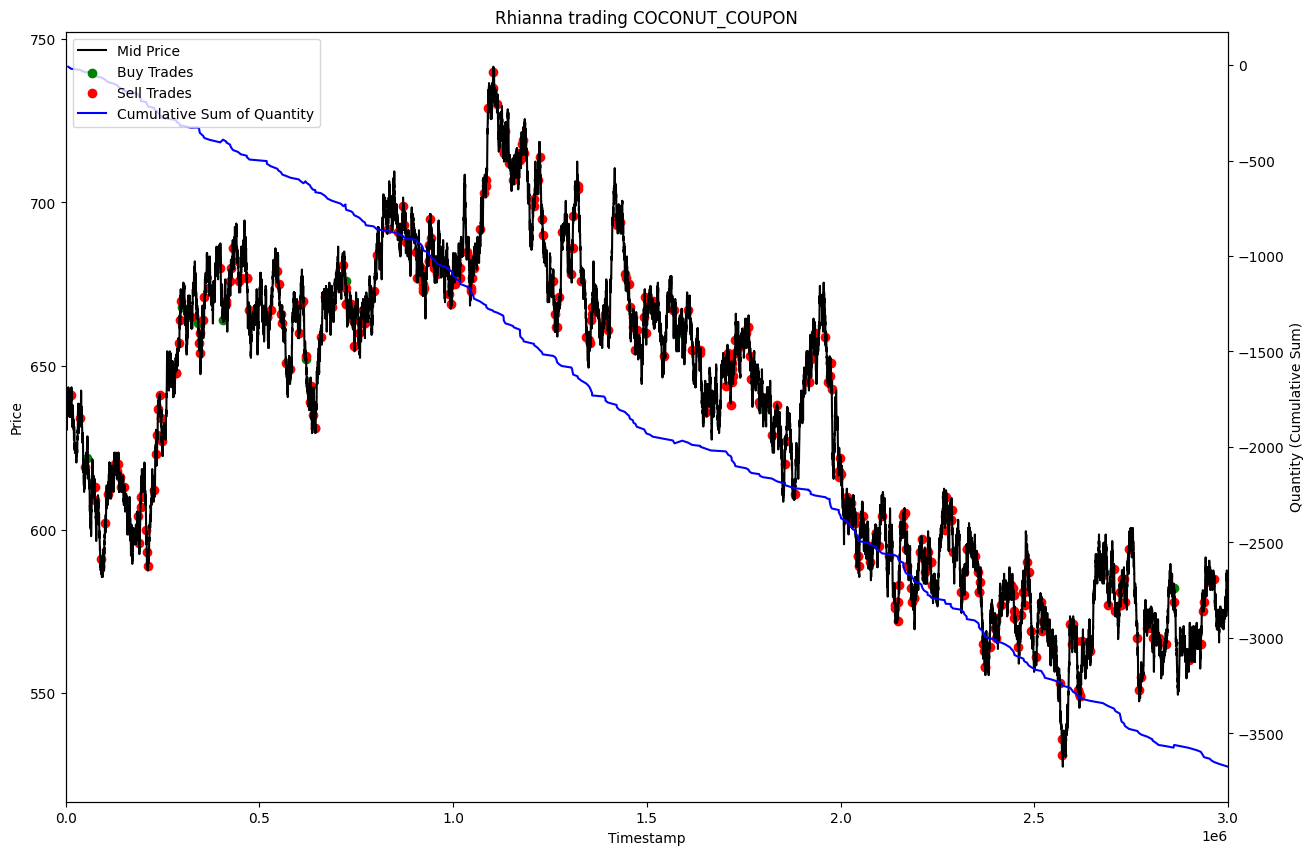

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


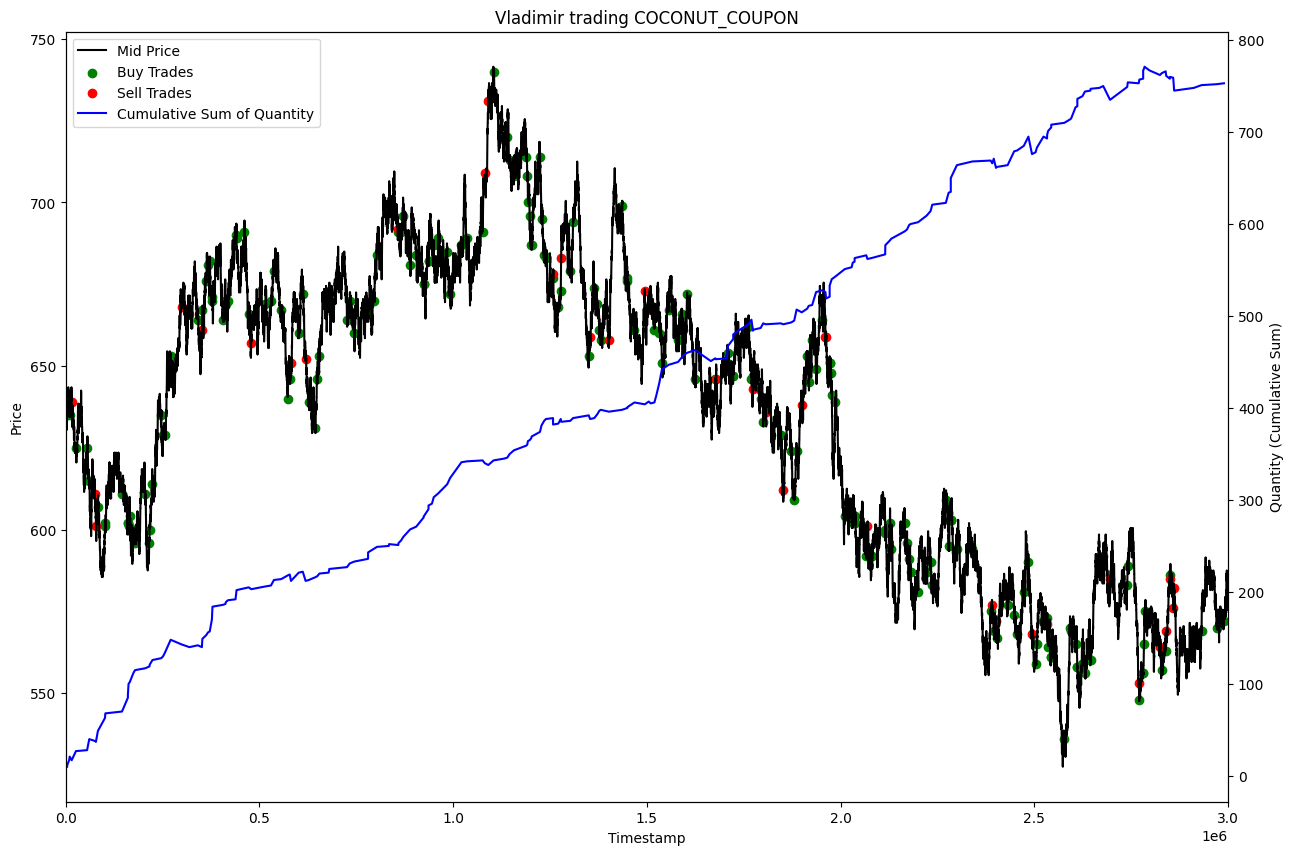

<ipython-input-28-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


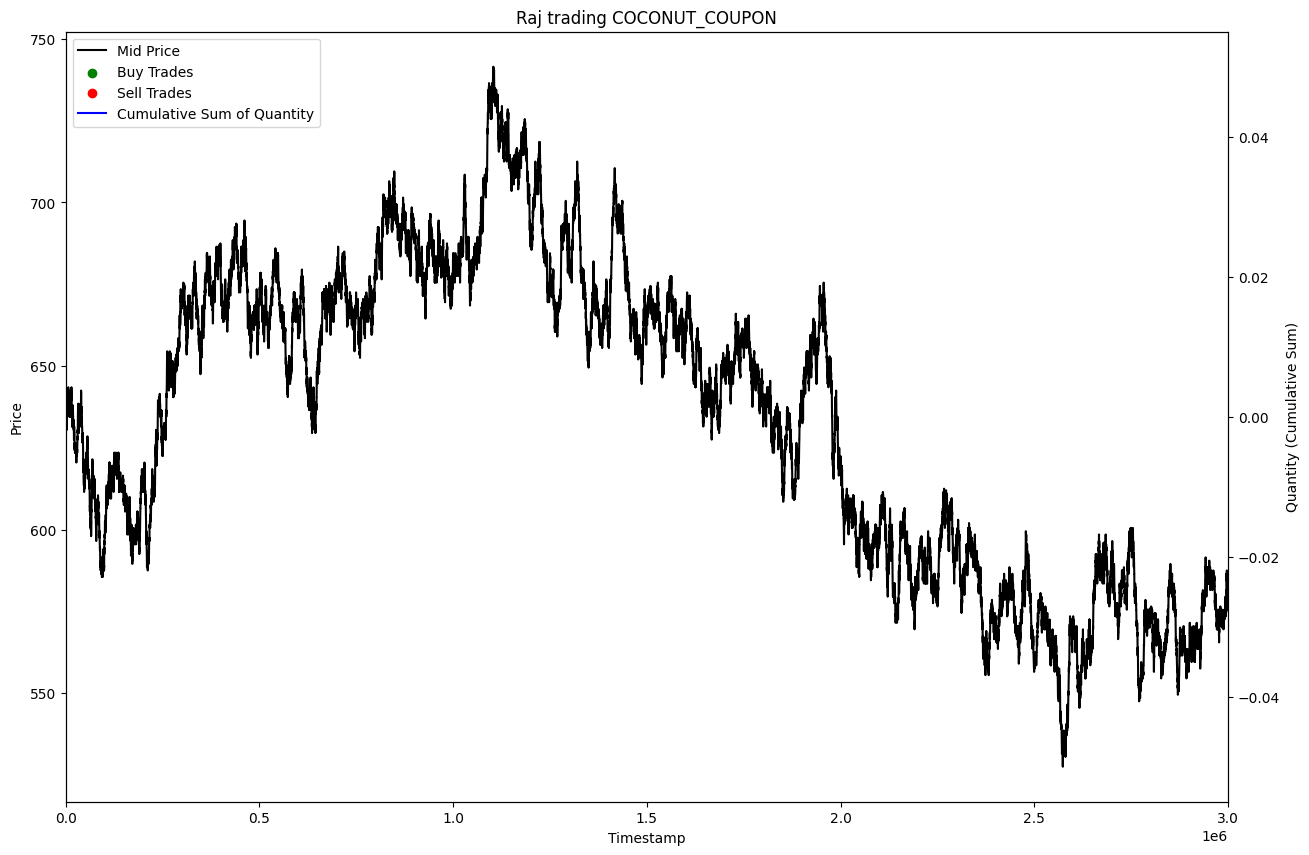

In [ ]:
for product in products:
  for trader in traders:
    plotter(product, trader, trades_df, prices_df, 'both', 0, 3000000)

<ipython-input-21-1cc7f8a4bc72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


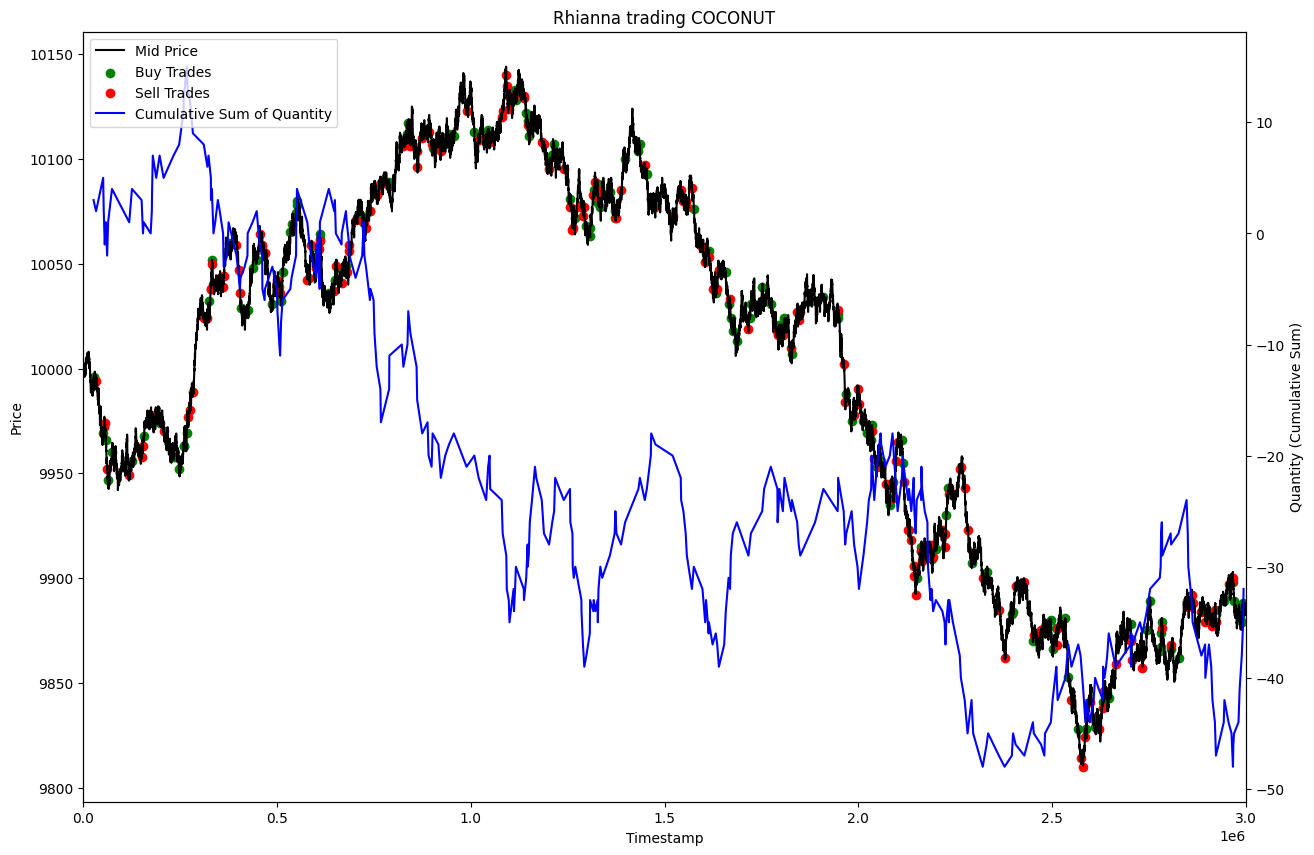

In [ ]:
plotter('COCONUT', 'Rhianna', trades_df, prices_df, 'both', 0, 3000000)

In [ ]:
for trader in traders:
  plotter('COCONUT', trader, trades_df, prices_df, 0, 2000000)

TypeError: plotter() missing 1 required positional argument: 'xlim2'

In [ ]:
COCONUT_LAST_PRICE = 9882.5
COUPON_LAST_PRICE = 2.439613
for symbol in products:
  for name in traders:
      mask = (trades_df['symbol'] == symbol) & \
        (trades_df["buyer"] == f"{name}") & \
        (trades_df['timestamp'] <= 1000000)

      # Apply the mask to the DataFrame
      temp1 = trades_df[mask]

      mask = (trades_df['symbol'] == symbol) & \
            (trades_df["seller"] == f"{name}") & \
            (trades_df['timestamp'] <= 1000000)

      # Apply the mask to the DataFrame
      temp2 = trades_df[mask]
      buys = (temp1["price"]*temp1["quantity"]).sum()
      sells = (temp2["price"]*temp2["quantity"]).sum()
      final_position = temp1['quantity'].sum() - temp2['quantity'].sum()
      if symbol == 'COCONUT':
        last_price = COCONUT_LAST_PRICE
      else:
        last_price = COUPON_LAST_PRICE
      print(f"{name} pnl for " + str(symbol) +': ', sells-buys + final_position * last_price)
      print(temp1['quantity'].max())
      print(temp2['quantity'].max())